In [30]:
import pandas as pd
import os

In [31]:
dfs=[]
for i in range(1994,2025):
    filepath=rf"D:\agnivesh\Projects\Tennis OutCome Prediction\tennis_atp-master\atp_matches_{str(i)}.csv"
    dfs.append(pd.read_csv(filepath))
df=pd.concat(dfs,axis=0,ignore_index=True)
df
df.to_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\Combined_Tennis_Data_1.csv",index=False)

In [32]:
check_df = pd.read_csv(r'D:\agnivesh\Projects\Tennis OutCome Prediction\Combined_Tennis_Data.csv')
check_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1994-339,Adelaide,Hard,32,A,19940103,1,101404,1.0,NaN,...,30.0,17.0,15.0,8.0,10.0,14.0,9.0,NaN,97.0,NaN
1,1994-339,Adelaide,Hard,32,A,19940103,2,101917,NaN,NaN,...,37.0,25.0,17.0,13.0,1.0,6.0,86.0,NaN,NaN,NaN
2,1994-339,Adelaide,Hard,32,A,19940103,3,102158,NaN,NaN,...,39.0,23.0,14.0,10.0,9.0,13.0,66.0,NaN,NaN,NaN
3,1994-339,Adelaide,Hard,32,A,19940103,4,101601,8.0,NaN,...,34.0,21.0,6.0,8.0,4.0,8.0,43.0,NaN,84.0,NaN
4,1994-339,Adelaide,Hard,32,A,19940103,5,101120,3.0,NaN,...,35.0,24.0,12.0,9.0,2.0,5.0,17.0,NaN,222.0,NaN


In [33]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [35]:
import pandas as pd
df=pd.read_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\Combined_Tennis_Data.csv")
elo_cols = [
    'tourney_date', 'surface', 'tourney_level', 'round',
    'winner_id', 'winner_name',
    'loser_id', 'loser_name',
    'score'
]
elo_df = df[elo_cols].copy()
elo_df.to_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_input_data.csv", index=False)


In [36]:
print(elo_df.isnull().sum())

tourney_date      0
surface          53
tourney_level     0
round             0
winner_id         0
winner_name       0
loser_id          0
loser_name        0
score             0
dtype: int64


In [37]:
# Total rows with at least one null
print("Total rows with any nulls:", elo_df.isnull().any(axis=1).sum())

Total rows with any nulls: 53


In [38]:
elo_df_cleaned = elo_df.dropna()
elo_df_cleaned.to_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_input_data_clean.csv", index=False)

In [39]:
print(elo_df_cleaned.isnull().sum())

tourney_date     0
surface          0
tourney_level    0
round            0
winner_id        0
winner_name      0
loser_id         0
loser_name       0
score            0
dtype: int64


In [40]:
elo_df_cleaned

,tourney_date,surface,tourney_level,round,winner_id,winner_name,loser_id,loser_name,score
0,19940103,Hard,A,R32,101404,Thomas Muster,101214,Bryan Shelton,6-2 6-2
1,19940103,Hard,A,R32,101917,Grant Stafford,101190,Darren Cahill,6-3 4-6 6-2
2,19940103,Hard,A,R32,102158,Patrick Rafter,210013,Martin Damm Sr,6-4 6-3
3,19940103,Hard,A,R32,101601,Brett Steven,101647,Byron Black,6-3 6-2
4,19940103,Hard,A,R32,101120,Karel Novacek,101682,David Adams,6-4 6-2
...,...,...,...,...,...,...,...,...,...
96961,20240203,Clay,D,RR,212051,Joaquin Aguilar Cardozo,209943,Ilya Snitari,6-1 6-0
96962,20240202,Hard,D,RR,122533,Nam Hoang Ly,202475,Philip Henning,6-3 6-4
96963,20240202,Hard,D,RR,144748,Kris Van Wyk,144775,Linh Giang Trinh,4-6 6-3 4-0
96964,20240202,Hard,D,RR,122533,Nam Hoang Ly,144748,Kris Van Wyk,6-4 3-6 6-3


In [44]:
final_elo_df.to_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_input_data_clean.csv", index=False)

   player_id            player_name  elo_rating
0     206173          Jannik Sinner     2162.49
1     104925         Novak Djokovic     2081.63
2     207989         Carlos Alcaraz     2016.79
3     103819          Roger Federer     2014.82
4     104417        Robin Soderling     2007.84
5     100644       Alexander Zverev     1958.56
6     105223  Juan Martin del Potro     1929.72
7     126203           Taylor Fritz     1912.96
8     106421        Daniil Medvedev     1904.11
9     106401           Nick Kyrgios     1899.46


In [48]:
import pandas as pd
df=elo_df_cleaned.copy()
df.sort_values(by=['tourney_date'],inplace=True)
initial_elo=1500
k=24

elo_map={}
name_map={}

def get_elo(player_id):
    return elo_map.get(player_id,initial_elo)

for idx,row in df.iterrows():
    winner_id=row['winner_id']
    loser_id=row['loser_id']
    winner_name=row['winner_name']
    loser_name=row['loser_name']

    name_map[winner_id]=winner_name
    name_map[loser_id]=loser_name

    ra=get_elo(winner_id)
    rb=get_elo(loser_id)

    ea=1/(1+10**((rb-ra)/400))
    eb=1-ea

    ra_new=ra+k*(1-ea)
    rb_new=rb+k*(0-(1-ea))

    elo_map[winner_id]=ra_new
    elo_map[loser_id]=rb_new

final_elo_df=pd.DataFrame([
    {'player_id':pid,'player_name':name_map.get(pid,'unknown'),'elo_rating':round(elo,2)}
    for pid,elo in elo_map.items()
])

final_elo_df = final_elo_df.sort_values(by='elo_rating', ascending=False).reset_index(drop=True)

print(final_elo_df.head(10))

   player_id            player_name  elo_rating
0     206173          Jannik Sinner     2162.49
1     104925         Novak Djokovic     2081.63
2     207989         Carlos Alcaraz     2016.79
3     103819          Roger Federer     2014.82
4     104417        Robin Soderling     2007.84
5     100644       Alexander Zverev     1958.56
6     105223  Juan Martin del Potro     1929.72
7     126203           Taylor Fritz     1912.96
8     106421        Daniil Medvedev     1904.11
9     106401           Nick Kyrgios     1899.46


In [49]:
final_elo_df

,player_id,player_name,elo_rating
0,206173,Jannik Sinner,2162.49
1,104925,Novak Djokovic,2081.63
2,207989,Carlos Alcaraz,2016.79
3,103819,Roger Federer,2014.82
4,104417,Robin Soderling,2007.84
...,...,...,...
3238,102023,Petr Luxa,1369.43
3239,101398,Neil Borwick,1364.08
3240,102031,Sandor Noszaly,1361.22
3241,108618,Karim Alayli,1356.74


In [52]:
final_elo_df.to_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_k24.csv", index=False)

In [55]:
import pandas as pd

def calculate_elo_ratings(df, k=26, initial_elo=1500):
    df = df.copy()
    df.sort_values(by=['tourney_date'], inplace=True)

    elo_map = {}
    name_map = {}

    def get_elo(player_id):
        return elo_map.get(player_id, initial_elo)

    for idx, row in df.iterrows():
        winner_id = row['winner_id']
        loser_id = row['loser_id']
        winner_name = row['winner_name']
        loser_name = row['loser_name']

        name_map[winner_id] = winner_name
        name_map[loser_id] = loser_name

        ra = get_elo(winner_id)
        rb = get_elo(loser_id)

        ea = 1 / (1 + 10 ** ((rb - ra) / 400))
        eb = 1 - ea

        ra_new = ra + k * (1 - ea)
        rb_new = rb + k * (0 - eb)

        elo_map[winner_id] = ra_new
        elo_map[loser_id] = rb_new

    final_elo_df = pd.DataFrame([
        {
            'player_id': pid,
            'player_name': name_map.get(pid, 'Unknown'),
            'elo_rating': round(elo, 2)
        }
        for pid, elo in elo_map.items()
    ])

    final_elo_df = final_elo_df.sort_values(by='elo_rating', ascending=False).reset_index(drop=True)

    return final_elo_df


In [56]:
for x in range(10, 51):
    elo_df = calculate_elo_ratings(elo_df_cleaned, k=x)
    elo_df.to_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_ratings\ELO_k_{x}.csv", index=False)


In [57]:
import pandas as pd

def calculate_surface_elo_ratings(df, k=24, initial_elo=1500):
    # Ensure matches are processed in order
    df = df.copy().sort_values(by='tourney_date')
    
    # Nested dictionary: {player_id: {surface: current_rating}}
    surface_elo_map = {}
    
    # Dictionary for storing names: {player_id: player_name}
    name_map = {}

    # Helper function to get current surface Elo rating for a player.
    def get_surface_elo(player_id, surface):
        if player_id not in surface_elo_map:
            surface_elo_map[player_id] = {}
        # If the rating for the given surface doesn't exist, initialize it.
        return surface_elo_map[player_id].get(surface, initial_elo)
    
    # Process each match
    for idx, row in df.iterrows():
        surface = row['surface']
        winner_id = row['winner_id']
        loser_id = row['loser_id']
        winner_name = row['winner_name']
        loser_name = row['loser_name']
        
        # Save the names for reporting
        name_map[winner_id] = winner_name
        name_map[loser_id] = loser_name
        
        # Get current Elo ratings for this surface
        ra = get_surface_elo(winner_id, surface)
        rb = get_surface_elo(loser_id, surface)
        
        # Calculate expected score for winner on this surface
        ea = 1 / (1 + 10 ** ((rb - ra) / 400))
        
        # Compute new ratings for the match on the given surface
        ra_new = ra + k * (1 - ea)
        rb_new = rb + k * (0 - (1 - ea))  # Alternatively, using eb = 1 - ea
        
        # Update the player's surface ratings
        surface_elo_map[winner_id][surface] = ra_new
        surface_elo_map[loser_id][surface] = rb_new

    # Prepare list for final DataFrame.
    records = []
    for player_id, surface_ratings in surface_elo_map.items():
        for surface, rating in surface_ratings.items():
            records.append({
                'player_id': player_id,
                'player_name': name_map.get(player_id, "Unknown"),
                'surface': surface,
                'elo_rating': round(rating, 2)
            })
    
    final_surface_elo_df = pd.DataFrame(records)
    final_surface_elo_df = final_surface_elo_df.sort_values(by=['surface', 'elo_rating'], ascending=[True, False]).reset_index(drop=True)
    return final_surface_elo_df

# Example usage:
surface_elo_df = calculate_surface_elo_ratings(elo_df_cleaned, k=24)
print(surface_elo_df.head(10))


   player_id         player_name surface  elo_rating
0     101948        Pete Sampras  Carpet     1775.32
1     102338  Yevgeny Kafelnikov  Carpet     1752.39
2     103819       Roger Federer  Carpet     1741.46
3     101414        Boris Becker  Carpet     1725.18
4     101320   Magnus Gustafsson  Carpet     1708.12
5     101990    Richard Krajicek  Carpet     1703.06
6     101736        Andre Agassi  Carpet     1695.83
7     103498         Marat Safin  Carpet     1695.24
8     103344       Ivan Ljubicic  Carpet     1686.33
9     101723      Magnus Larsson  Carpet     1685.18


In [59]:
for x in range(10, 51):
    surface_elo_df = calculate_surface_elo_ratings(elo_df_cleaned, k=x)
    surface_elo_df.to_csv(rf"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_ratings\Sur_ELO_k_{x}.csv", index=False)


In [61]:
import pandas as pd

def create_feature_enriched_df(df_cleaned, k, elo_dir, save_dir):
    overall = pd.read_csv(f"{elo_dir}/ELO_k_{k}.csv")
    surface = pd.read_csv(f"{elo_dir}/Sur_ELO_k_{k}.csv")

    # Create dicts for quick lookup
    overall_elo_dict = dict(zip(overall['player_id'], overall['elo_rating']))
    surface_elo_dict = surface.set_index(['player_id', 'surface'])['elo_rating'].to_dict()

    df = df_cleaned.copy()

    def get_elo(pid, surface, elo_type='overall'):
        if elo_type == 'overall':
            return overall_elo_dict.get(pid, 1500)
        else:
            return surface_elo_dict.get((pid, surface), 1500)

    df['winner_overall_elo'] = df.apply(lambda row: get_elo(row['winner_id'], row['surface'], 'overall'), axis=1)
    df['loser_overall_elo'] = df.apply(lambda row: get_elo(row['loser_id'], row['surface'], 'overall'), axis=1)
    df['winner_surface_elo'] = df.apply(lambda row: get_elo(row['winner_id'], row['surface'], 'surface'), axis=1)
    df['loser_surface_elo'] = df.apply(lambda row: get_elo(row['loser_id'], row['surface'], 'surface'), axis=1)

    df['elo_diff_overall'] = df['winner_overall_elo'] - df['loser_overall_elo']
    df['elo_diff_surface'] = df['winner_surface_elo'] - df['loser_surface_elo']
    df['label'] = 1  # Since winner actually won

    df.to_csv(f"{save_dir}/Match_Features_k_{k}.csv", index=False)

    print(f"✅ Saved Match_Features_k_{k}.csv")

# Example loop
elo_dir = r"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_ratings"
save_dir = r"D:\agnivesh\Projects\Tennis OutCome Prediction\Match_Features"

for k in range(10, 51):
    create_feature_enriched_df(elo_df_cleaned, k, elo_dir, save_dir)


✅ Saved Match_Features_k_10.csv
✅ Saved Match_Features_k_11.csv
✅ Saved Match_Features_k_12.csv
✅ Saved Match_Features_k_13.csv
✅ Saved Match_Features_k_14.csv
✅ Saved Match_Features_k_15.csv
✅ Saved Match_Features_k_16.csv
✅ Saved Match_Features_k_17.csv
✅ Saved Match_Features_k_18.csv
✅ Saved Match_Features_k_19.csv
✅ Saved Match_Features_k_20.csv
✅ Saved Match_Features_k_21.csv
✅ Saved Match_Features_k_22.csv
✅ Saved Match_Features_k_23.csv
✅ Saved Match_Features_k_24.csv
✅ Saved Match_Features_k_25.csv
✅ Saved Match_Features_k_26.csv
✅ Saved Match_Features_k_27.csv
✅ Saved Match_Features_k_28.csv
✅ Saved Match_Features_k_29.csv
✅ Saved Match_Features_k_30.csv
✅ Saved Match_Features_k_31.csv
✅ Saved Match_Features_k_32.csv
✅ Saved Match_Features_k_33.csv
✅ Saved Match_Features_k_34.csv
✅ Saved Match_Features_k_35.csv
✅ Saved Match_Features_k_36.csv
✅ Saved Match_Features_k_37.csv
✅ Saved Match_Features_k_38.csv
✅ Saved Match_Features_k_39.csv
✅ Saved Match_Features_k_40.csv
✅ Saved 

k=10: Accuracy = 67.03%
k=11: Accuracy = 67.14%
k=12: Accuracy = 67.12%
k=13: Accuracy = 67.09%
k=14: Accuracy = 67.09%
k=15: Accuracy = 66.87%
k=16: Accuracy = 66.97%
k=17: Accuracy = 66.81%
k=18: Accuracy = 66.76%
k=19: Accuracy = 66.63%
k=20: Accuracy = 66.56%
k=21: Accuracy = 66.53%
k=22: Accuracy = 66.37%
k=23: Accuracy = 66.29%
k=24: Accuracy = 66.15%
k=25: Accuracy = 66.06%
k=26: Accuracy = 66.09%
k=27: Accuracy = 66.06%
k=28: Accuracy = 65.93%
k=29: Accuracy = 65.81%
k=30: Accuracy = 65.91%
k=31: Accuracy = 65.67%
k=32: Accuracy = 65.68%
k=33: Accuracy = 65.56%
k=34: Accuracy = 65.49%
k=35: Accuracy = 65.51%
k=36: Accuracy = 65.24%
k=37: Accuracy = 65.39%
k=38: Accuracy = 65.41%
k=39: Accuracy = 65.42%
k=40: Accuracy = 65.27%
k=41: Accuracy = 65.46%
k=42: Accuracy = 65.05%
k=43: Accuracy = 64.99%
k=44: Accuracy = 65.08%
k=45: Accuracy = 64.87%
k=46: Accuracy = 64.89%
k=47: Accuracy = 64.9%
k=48: Accuracy = 64.74%
k=49: Accuracy = 64.92%
k=50: Accuracy = 64.65%


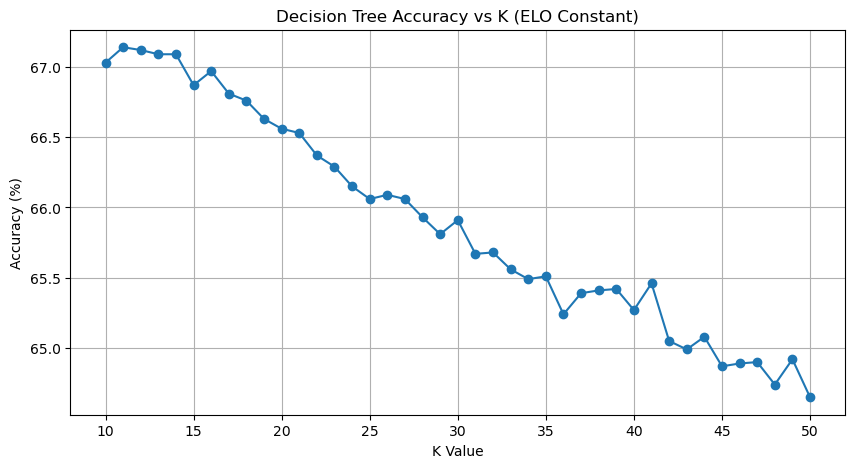

In [62]:
import pandas as pd
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluate_k_accuracy(k, feature_dir):
    df = pd.read_csv(f"{feature_dir}/Match_Features_k_{k}.csv")

    # Add 0-labels by randomly swapping winner/loser
    rows = []
    for idx, row in df.iterrows():
        # Flip a coin: 50% swap
        if random.random() < 0.5:
            rows.append({
                'elo_diff_overall': row['elo_diff_overall'],
                'elo_diff_surface': row['elo_diff_surface'],
                'label': 1
            })
        else:
            rows.append({
                'elo_diff_overall': -row['elo_diff_overall'],
                'elo_diff_surface': -row['elo_diff_surface'],
                'label': 0
            })
    new_df = pd.DataFrame(rows)

    X = new_df[['elo_diff_overall', 'elo_diff_surface']]
    y = new_df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    acc = accuracy_score(y_test, preds)
    return round(acc * 100, 2)

# Directory path
feature_dir = r"D:\agnivesh\Projects\Tennis OutCome Prediction\Match_Features"

# Evaluate for all k values
k_accuracy = {}
for k in range(10, 51):
    acc = evaluate_k_accuracy(k, feature_dir)
    k_accuracy[k] = acc
    print(f"k={k}: Accuracy = {acc}%")

# Optional: plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(list(k_accuracy.keys()), list(k_accuracy.values()), marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy (%)")
plt.title("Decision Tree Accuracy vs K (ELO Constant)")
plt.grid(True)
plt.show()


k=10: Accuracy = 67.02%
k=11: Accuracy = 67.1%
k=12: Accuracy = 67.14%
k=13: Accuracy = 67.09%
k=14: Accuracy = 67.07%
k=15: Accuracy = 66.69%
k=16: Accuracy = 66.97%
k=17: Accuracy = 66.83%
k=18: Accuracy = 66.76%
k=19: Accuracy = 66.69%
k=20: Accuracy = 66.59%
k=21: Accuracy = 66.55%
k=22: Accuracy = 66.4%
k=23: Accuracy = 66.22%
k=24: Accuracy = 66.16%
k=25: Accuracy = 66.04%
k=26: Accuracy = 66.05%
k=27: Accuracy = 66.06%
k=28: Accuracy = 66.01%
k=29: Accuracy = 65.88%
k=30: Accuracy = 65.9%
k=31: Accuracy = 65.66%
k=32: Accuracy = 65.6%
k=33: Accuracy = 65.57%
k=34: Accuracy = 65.55%
k=35: Accuracy = 65.5%
k=36: Accuracy = 65.41%
k=37: Accuracy = 65.38%
k=38: Accuracy = 65.39%
k=39: Accuracy = 65.49%
k=40: Accuracy = 65.39%
k=41: Accuracy = 65.08%
k=42: Accuracy = 65.05%
k=43: Accuracy = 65.32%
k=44: Accuracy = 65.03%
k=45: Accuracy = 65.18%
k=46: Accuracy = 64.9%
k=47: Accuracy = 64.78%
k=48: Accuracy = 64.87%
k=49: Accuracy = 64.64%
k=50: Accuracy = 64.64%


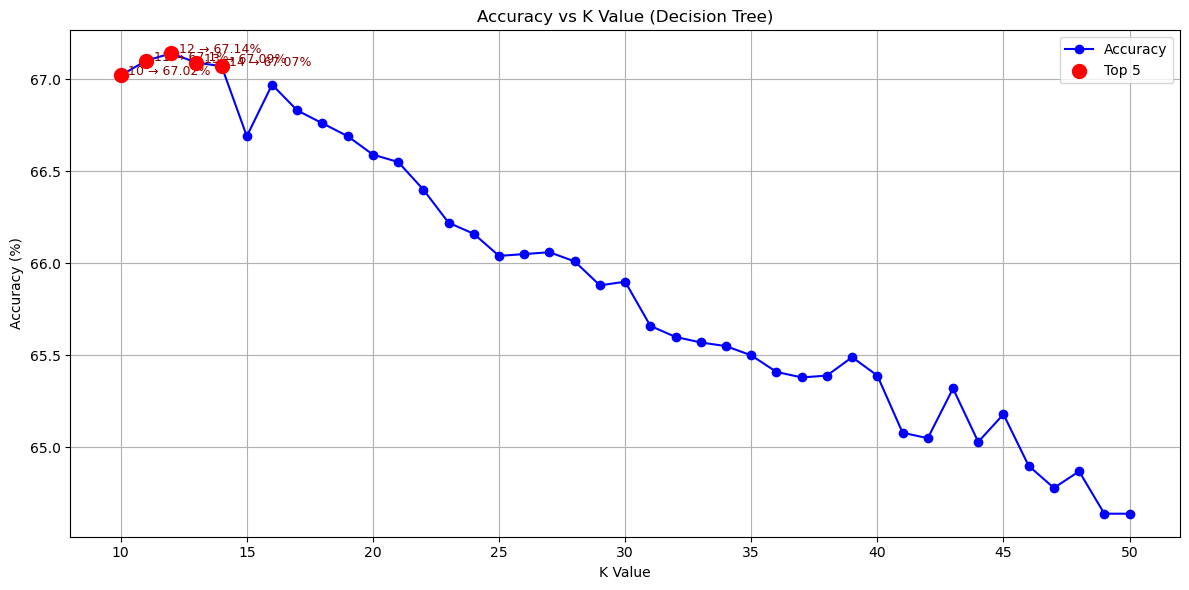

In [63]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluate_k_accuracy(k, feature_dir):
    df = pd.read_csv(f"{feature_dir}/Match_Features_k_{k}.csv")

    rows = []
    for idx, row in df.iterrows():
        if random.random() < 0.5:
            rows.append({
                'elo_diff_overall': row['elo_diff_overall'],
                'elo_diff_surface': row['elo_diff_surface'],
                'label': 1
            })
        else:
            rows.append({
                'elo_diff_overall': -row['elo_diff_overall'],
                'elo_diff_surface': -row['elo_diff_surface'],
                'label': 0
            })
    new_df = pd.DataFrame(rows)

    X = new_df[['elo_diff_overall', 'elo_diff_surface']]
    y = new_df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    acc = accuracy_score(y_test, preds)
    return round(acc * 100, 2)

# Directory path
feature_dir = r"D:\agnivesh\Projects\Tennis OutCome Prediction\Match_Features"

# Evaluate accuracy for k from 10 to 50
k_accuracy = {}
for k in range(10, 51):
    acc = evaluate_k_accuracy(k, feature_dir)
    k_accuracy[k] = acc
    print(f"k={k}: Accuracy = {acc}%")

# Sort to find top 5
sorted_k = sorted(k_accuracy.items(), key=lambda x: x[1], reverse=True)
top5 = sorted_k[:5]
top5_k = [k for k, _ in top5]
top5_acc = [acc for _, acc in top5]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(k_accuracy.keys(), k_accuracy.values(), label='Accuracy', color='blue', marker='o')
plt.scatter(top5_k, top5_acc, color='red', label='Top 5', s=100, zorder=5)

for i in range(5):
    plt.text(top5_k[i]+0.3, top5_acc[i], f"{top5_k[i]} → {top5_acc[i]}%", fontsize=9, color='darkred')

plt.title("Accuracy vs K Value (Decision Tree)")
plt.xlabel("K Value")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Surface ELO → k=10: Accuracy = 67.13%
Surface ELO → k=11: Accuracy = 67.14%
Surface ELO → k=12: Accuracy = 67.14%
Surface ELO → k=13: Accuracy = 67.11%
Surface ELO → k=14: Accuracy = 67.04%
Surface ELO → k=15: Accuracy = 66.99%
Surface ELO → k=16: Accuracy = 66.96%
Surface ELO → k=17: Accuracy = 66.87%
Surface ELO → k=18: Accuracy = 66.4%
Surface ELO → k=19: Accuracy = 66.7%
Surface ELO → k=20: Accuracy = 66.58%
Surface ELO → k=21: Accuracy = 66.56%
Surface ELO → k=22: Accuracy = 66.41%
Surface ELO → k=23: Accuracy = 66.27%
Surface ELO → k=24: Accuracy = 66.16%
Surface ELO → k=25: Accuracy = 66.16%
Surface ELO → k=26: Accuracy = 66.06%
Surface ELO → k=27: Accuracy = 66.09%
Surface ELO → k=28: Accuracy = 65.89%
Surface ELO → k=29: Accuracy = 65.83%
Surface ELO → k=30: Accuracy = 65.77%
Surface ELO → k=31: Accuracy = 65.72%
Surface ELO → k=32: Accuracy = 65.65%
Surface ELO → k=33: Accuracy = 65.59%
Surface ELO → k=34: Accuracy = 65.44%
Surface ELO → k=35: Accuracy = 65.44%
Surface ELO → 

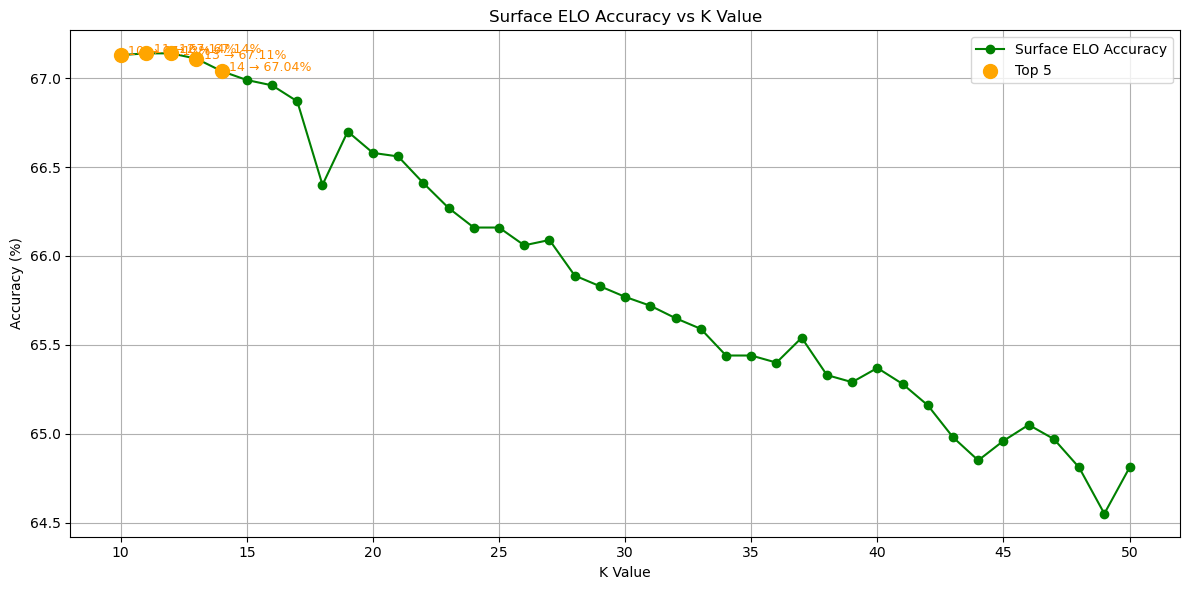

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluate_surface_elo_accuracy(k, feature_dir):
    df = pd.read_csv(f"{feature_dir}/Match_Features_k_{k}.csv")

    rows = []
    for idx, row in df.iterrows():
        if random.random() < 0.5:
            rows.append({
                'elo_diff_surface': row['elo_diff_surface'],
                'label': 1
            })
        else:
            rows.append({
                'elo_diff_surface': -row['elo_diff_surface'],
                'label': 0
            })
    new_df = pd.DataFrame(rows)

    X = new_df[['elo_diff_surface']]
    y = new_df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    acc = accuracy_score(y_test, preds)
    return round(acc * 100, 2)

# Path to features
feature_dir = r"D:\agnivesh\Projects\Tennis OutCome Prediction\Match_Features"

# Loop and store accuracy
surface_elo_acc = {}
for k in range(10, 51):
    acc = evaluate_surface_elo_accuracy(k, feature_dir)
    surface_elo_acc[k] = acc
    print(f"Surface ELO → k={k}: Accuracy = {acc}%")

# Top 5
sorted_surface = sorted(surface_elo_acc.items(), key=lambda x: x[1], reverse=True)
top5_surf_k = [k for k, _ in sorted_surface[:5]]
top5_surf_acc = [acc for _, acc in sorted_surface[:5]]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(surface_elo_acc.keys(), surface_elo_acc.values(), label='Surface ELO Accuracy', color='green', marker='o')
plt.scatter(top5_surf_k, top5_surf_acc, color='orange', label='Top 5', s=100, zorder=5)

for i in range(5):
    plt.text(top5_surf_k[i]+0.3, top5_surf_acc[i], f"{top5_surf_k[i]} → {top5_surf_acc[i]}%", fontsize=9, color='darkorange')

plt.title("Surface ELO Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


k=10 → Overall ELO Accuracy: 65.24%
k=11 → Overall ELO Accuracy: 65.04%
k=12 → Overall ELO Accuracy: 64.75%
k=13 → Overall ELO Accuracy: 64.62%
k=14 → Overall ELO Accuracy: 64.5%
k=15 → Overall ELO Accuracy: 64.34%
k=16 → Overall ELO Accuracy: 64.22%
k=17 → Overall ELO Accuracy: 64.06%
k=18 → Overall ELO Accuracy: 64.08%
k=19 → Overall ELO Accuracy: 63.91%
k=20 → Overall ELO Accuracy: 64.21%
k=21 → Overall ELO Accuracy: 63.9%
k=22 → Overall ELO Accuracy: 63.88%
k=23 → Overall ELO Accuracy: 63.82%
k=24 → Overall ELO Accuracy: 63.72%
k=25 → Overall ELO Accuracy: 63.49%
k=26 → Overall ELO Accuracy: 63.41%
k=27 → Overall ELO Accuracy: 63.57%
k=28 → Overall ELO Accuracy: 63.45%
k=29 → Overall ELO Accuracy: 63.43%
k=30 → Overall ELO Accuracy: 63.31%
k=31 → Overall ELO Accuracy: 63.27%
k=32 → Overall ELO Accuracy: 63.19%
k=33 → Overall ELO Accuracy: 63.1%
k=34 → Overall ELO Accuracy: 63.14%
k=35 → Overall ELO Accuracy: 62.93%
k=36 → Overall ELO Accuracy: 62.86%
k=37 → Overall ELO Accuracy: 62

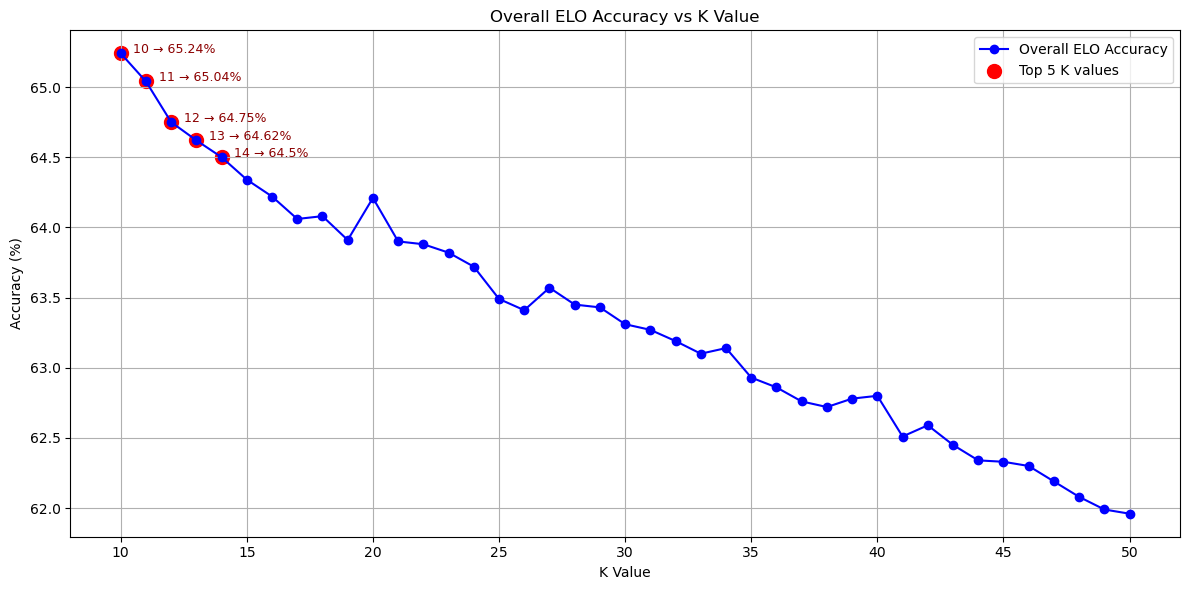

In [6]:
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Paths
elo_ratings_path = r"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_ratings"
match_data_path = r"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_input_data_clean.csv"

# Load base match data
base_df = pd.read_csv(match_data_path)

def evaluate_overall_elo_accuracy(k):
    overall_elo_path = os.path.join(elo_ratings_path, f"ELO_k_{k}.csv")
    overall_elo_df = pd.read_csv(overall_elo_path)

    # Create ELO map
    elo_map = dict(zip(overall_elo_df['player_id'], overall_elo_df['elo_rating']))

    rows = []
    for idx, row in base_df.iterrows():
        winner_id = row['winner_id']
        loser_id = row['loser_id']

        winner_elo = elo_map.get(winner_id, 1500)
        loser_elo = elo_map.get(loser_id, 1500)

        # Random perspective
        if random.random() < 0.5:
            elo_diff = winner_elo - loser_elo
            label = 1
        else:
            elo_diff = loser_elo - winner_elo
            label = 0

        rows.append({'elo_diff': elo_diff, 'label': label})

    match_df = pd.DataFrame(rows)

    X = match_df[['elo_diff']]
    y = match_df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    return round(accuracy_score(y_test, preds) * 100, 2)

# Run for all K values
overall_accuracies = {}
for k in range(10, 51):
    acc = evaluate_overall_elo_accuracy(k)
    overall_accuracies[k] = acc
    print(f"k={k} → Overall ELO Accuracy: {acc}%")

# Save to CSV
accuracy_df = pd.DataFrame([
    {'k': k, 'overall_elo_accuracy': acc} for k, acc in overall_accuracies.items()
])
accuracy_df.to_csv(os.path.join(elo_ratings_path, "Overall_ELO_Accuracy.csv"), index=False)

# Plotting
sorted_acc = sorted(overall_accuracies.items(), key=lambda x: x[1], reverse=True)
top5_k = [k for k, _ in sorted_acc[:5]]
top5_acc = [acc for _, acc in sorted_acc[:5]]

plt.figure(figsize=(12, 6))
plt.plot(overall_accuracies.keys(), overall_accuracies.values(), marker='o', label='Overall ELO Accuracy', color='blue')
plt.scatter(top5_k, top5_acc, color='red', label='Top 5 K values', s=100)

for i in range(5):
    plt.text(top5_k[i] + 0.5, top5_acc[i], f"{top5_k[i]} → {top5_acc[i]}%", fontsize=9, color='darkred')

plt.title("Overall ELO Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import os
import pandas as pd

# Corrected path
match_data_path = r"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_input_data_clean.csv"
elo_ratings_path = r"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_ratings"

# Load base match data
base_df = pd.read_csv(match_data_path)

def evaluate_overall_elo_accuracy(k):
    # Load overall ELO ratings
    overall_elo_path = os.path.join(elo_ratings_path, f"ELO_k_{k}.csv")
    overall_elo_df = pd.read_csv(overall_elo_path)

    # Merge base data with ELO
    merged_df = base_df.merge(overall_elo_df[['player_id', 'elo_rating']], left_on='winner_id', right_on='player_id', how='left').rename(columns={'elo_rating': 'winner_elo'})
    merged_df = merged_df.merge(overall_elo_df[['player_id', 'elo_rating']], left_on='loser_id', right_on='player_id', how='left').rename(columns={'elo_rating': 'loser_elo'})

    # Drop rows where ELO is missing
    merged_df = merged_df.dropna(subset=['winner_elo', 'loser_elo'])

    # Predict winner based on ELO
    merged_df['predicted_winner'] = merged_df['winner_elo'] > merged_df['loser_elo']
    
    # Accuracy: how many times prediction matched actual winner
    accuracy = merged_df['predicted_winner'].mean()

    return round(accuracy * 100, 2)

# Loop through k values and collect accuracy
accuracy_results = []

for k in range(10, 51):
    acc = evaluate_overall_elo_accuracy(k)
    accuracy_results.append({'k': k, 'accuracy': acc})

# Convert to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)
print(accuracy_df)

# Save if needed
accuracy_df.to_csv(r"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_ratings\overall_elo_accuracy.csv", index=False)



     k  accuracy
0   10     65.20
1   11     65.13
2   12     65.02
3   13     64.88
4   14     64.78
5   15     64.67
6   16     64.65
7   17     64.55
8   18     64.44
9   19     64.36
10  20     64.30
11  21     64.21
12  22     64.15
13  23     64.08
14  24     63.96
15  25     63.84
16  26     63.82
17  27     63.75
18  28     63.66
19  29     63.60
20  30     63.51
21  31     63.43
22  32     63.39
23  33     63.31
24  34     63.26
25  35     63.19
26  36     63.14
27  37     63.03
28  38     62.98
29  39     62.89
30  40     62.86
31  41     62.82
32  42     62.80
33  43     62.71
34  44     62.67
35  45     62.64
36  46     62.60
37  47     62.55
38  48     62.50
39  49     62.45
40  50     62.38


In [13]:
import pandas as pd
match_df = pd.read_csv(r"D:\agnivesh\Projects\Tennis OutCome Prediction\ELO_input_data_clean.csv")


In [25]:
print(match_df.columns.tolist())



['tourney_date', 'surface', 'tourney_level', 'round', 'winner_id', 'winner_name', 'loser_id', 'loser_name', 'score']


In [ ]:
import pandas as pd

# 1) Load
df = pd.read_csv(r"D:\agnivesh\Projects\Tennis OutCome Prediction\Combined_Tennis_Data_1.csv")

# 2) Convert date & drop any rows missing a critical column
df['tourney_date'] = pd.to_datetime(df['tourney_date'], errors='coerce')
needed = [
    'tourney_date','match_num','surface',
    'winner_id','loser_id',
    'w_ace','l_ace','w_df','l_df','w_svpt','l_svpt',
    'w_1stIn','l_1stIn','w_1stWon','l_1stWon',
    'w_2ndWon','l_2ndWon','w_SvGms','l_SvGms',
    'w_bpSaved','l_bpSaved','w_bpFaced','l_bpFaced'
]
# drop rows with missing core info
df = df.dropna(subset=needed)

# 3) Ensure no nulls in your stat columns
stat_cols = [c for c in needed if c not in ('tourney_date','match_num','surface','winner_id','loser_id')]
df[stat_cols] = df[stat_cols].fillna(0)

# 4) Now you can run the feature‑construction script without errors


In [ ]:
import pandas as pd
from collections import defaultdict, deque

print("Starting script...")

# 1. Load your data
try:
    df = pd.read_csv(r"D:\agnivesh\Projects\Tennis OutCome Prediction\Combined_Tennis_Data_1.csv")
    print("Data loaded successfully. Shape:", df.shape)
except Exception as e:
    print("❌ Error loading CSV:", e)
    exit()

# 2. Sort chronologically
try:
    df.sort_values(by=['tourney_date', 'match_num'], inplace=True)
    print("✅ Data sorted by date and match_num.")
except Exception as e:
    print("❌ Error sorting data:", e)
    exit()

# 3. Create Player_A (winner) and Player_B (loser) labels
try:
    df['Player_A'] = df['winner_id']
    df['Player_B'] = df['loser_id']
    df['Winner'] = 1  # A always won
    print("✅ Player columns created.")
except Exception as e:
    print("❌ Error setting up players:", e)
    exit()

# Prepare output DataFrame
data = df.copy()

# 4. Head-to-Head stats
h2h = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
h2h_diff = []
h2h_surface = []

try:
    for _, row in df.iterrows():
        A, B = row['Player_A'], row['Player_B']
        surf = row['surface']
        h2h_diff.append(h2h[A][B]['Overall'] - h2h[B][A]['Overall'])
        h2h_surface.append(h2h[A][B][surf] - h2h[B][A][surf])
        h2h[A][B]['Overall'] += 1
        h2h[A][B][surf] += 1

    data['H2H_DIFF'] = h2h_diff
    data['H2H_SURFACE_DIFF'] = h2h_surface
    print("✅ H2H features created.")
except Exception as e:
    print("❌ Error in H2H calculation:", e)
    exit()

# 5. Win-streak differential
try:
    for N in [3, 5, 10, 25, 100]:
        lastN = defaultdict(lambda: deque(maxlen=N))
        diffs = []
        for _, row in df.iterrows():
            A, B = row['Player_A'], row['Player_B']
            diffs.append(sum(lastN[A]) - sum(lastN[B]))
            lastN[A].append(1)
            lastN[B].append(0)
        data[f'WIN_LAST_{N}_DIFF'] = diffs
    print("✅ Win streak features created.")
except Exception as e:
    print("❌ Error in win streak calculation:", e)
    exit()

# 6. Performance metric differential
metrics = ['ace','df','svpt','1stIn','1stWon','2ndWon','SvGms','bpSaved','bpFaced']
try:
    for N in [3, 5, 10, 20, 50, 100]:
        for m in metrics:
            lastN = defaultdict(lambda: deque(maxlen=N))
            diffs = []
            for _, row in df.iterrows():
                A, B = row['Player_A'], row['Player_B']
                A_score = row.get(f'w_{m}', 0)
                B_score = row.get(f'l_{m}', 0)
                diffs.append(sum(lastN[A]) - sum(lastN[B]))
                lastN[A].append(A_score)
                lastN[B].append(B_score)
            data[f'P_{m.upper()}LAST{N}_DIFF'] = diffs
    print("✅ Performance metric features created.")
except Exception as e:
    print("❌ Error in performance metric calculation:", e)
    exit()

# 7. Inspect sample outputs
try:
    print("\n🔍 H2H Preview:\n", data.filter(like='H2H').head())
    print("\n🔍 WIN_STREAK Preview:\n", data.filter(like='WIN_LAST').head())
    print("\n🔍 ACE Metric Preview:\n", data.filter(like='P_ACE').head())
except Exception as e:
    print("❌ Error during preview print:", e)

# 8. Save final CSV
try:
    output_path = r"D:\agnivesh\Projects\Tennis OutCome Prediction\tennis_with_features11.csv"
    data.to_csv(output_path, index=False)
    print(f"✅ File saved successfully at: {output_path}")
except Exception as e:
    print("❌ Error saving CSV:", e)
